## The normal equation

In [5]:
# Random linear dataset
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [9]:
# The normal equation
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.78195316],
       [3.15042585]])

In [11]:
# Some predictions
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.78195316],
       [10.08280485]])

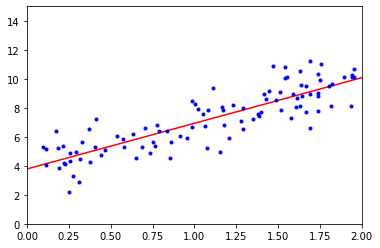

In [17]:
import matplotlib.pyplot as plt 
plt.plot(X_new, y_predict, "r-")
plt.axis([0, 2, 0, 15])
plt.plot(X, y, "b.")

In [21]:
# Linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([3.78195316]), array([[3.15042585]]))

In [22]:
lin_reg.predict(X_new)

array([[ 3.78195316],
       [10.08280485]])